# **Customer churn prediction**

---



Individual Assignment #3 (150 points):
Build classification machine learning models in Python using Customer Churn Prediction dataset
(https://www.kaggle.com/c/customer-churn-prediction/data) or any other dataset of your choice.
1. Develop ML models in Python, using Jupyter Notebook or any other tool of your choice. Apply LogisticRegression,
SVM, RandomForest classification algorithms. Apply Data Science Process Model as a guide. (80 points)
2. Apply GridSearchCV to find the best hyperparameters for your models. (30 points)
3. Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business
impact viewpoint (false negatives vs false positives). (20 points)
4. Based on your churn predictive model, what are two key recommendations you will make to your business
stakeholder as potential actions for the business outcome (reduced churn)? Think creatively to highlight your business
communication! (20 points)
Submission Instructions:
Submit the assignment in Canvas (Python notebook and ML Canvas files), by 5/17. To be fair to everyone, late submissions
will NOT be accepted.


## Import library

In [0]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

##Ingestion

###import data

#### train

In [76]:
df_train = pd.read_csv("https://raw.githubusercontent.com/xinyanLyu/Telecom_churn/master/churn_train.csv")

df_train.shape

(3333, 21)

In [77]:
df_train.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
st            3333 non-null object
acclen        3333 non-null int64
arcode        3333 non-null int64
phnum         3333 non-null object
intplan       3333 non-null object
voice         3333 non-null object
nummailmes    3333 non-null int64
tdmin         3333 non-null float64
tdcal         3333 non-null int64
tdchar        3333 non-null float64
temin         3333 non-null float64
tecal         3333 non-null int64
tecahr        3333 non-null float64
tnmin         3333 non-null float64
tncal         3333 non-null int64
tnchar        3333 non-null float64
timin         3333 non-null float64
tical         3333 non-null int64
tichar        3333 non-null float64
ncsc          3333 non-null int64
label         3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [79]:
df_train.describe()

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [80]:
df_train['label'].replace({' False.':0, ' True.':1}, inplace=True)
df_train['label'].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [0]:
df_train['intplan'].replace({' no':0, ' yes':1}, inplace=True)
df_train['voice'].replace({' no':0, ' yes':1}, inplace=True)

In [82]:
df_train.head(12)

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,329-9001,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,335-4719,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,330-8173,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


#### test

In [84]:
df_test = pd.read_csv("https://raw.githubusercontent.com/xinyanLyu/Telecom_churn/master/churn_test.csv")

df_test.shape

(1667, 21)

In [85]:
df_test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [86]:
df_test.describe()

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,436.369526,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,41.890588,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,408.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,408.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,415.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,415.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,238.000000,510.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


In [87]:
df_test['label'].replace({'False.':0, 'True.':1}, inplace=True)
df_test['intplan'].replace({'no':0, 'yes':1}, inplace=True)
df_test['voice'].replace({'no':0, 'yes':1}, inplace=True)
df_test.head(12)

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
5,IA,117,415,375-6180,0,0,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,0
6,ND,63,415,348-8073,0,1,32,218.9,124,37.21,214.3,125,18.22,260.3,120,11.71,12.9,3,3.48,1,0
7,LA,94,408,359-9881,0,0,0,157.5,97,26.78,224.5,112,19.08,310.8,106,13.99,11.1,6,3.00,0,0
8,MO,138,510,353-6954,0,0,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,0
9,TX,128,415,403-4933,0,1,43,177.8,100,30.23,147.3,89,12.52,194.2,92,8.74,11.9,1,3.21,0,0


#### check

In [0]:
df_check = pd.read_csv("https://raw.githubusercontent.com/xinyanLyu/Telecom_churn/master/check.txt",header=None)

df_check.shape

(335, 20)

In [0]:
df_check.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,CO,71,415,332-9896,no,no,0,211.2,70,35.90,252.7,122,21.48,225.8,104,10.16,12.3,3,3.32,0
1,KY,76,415,407-8575,no,no,0,204.0,69,34.68,225.1,110,19.13,240.3,85,10.81,9.6,5,2.59,1
2,NJ,87,510,387-2799,no,no,0,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,4,3.92,3
3,IL,117,408,373-9108,no,no,0,119.0,82,20.23,187.5,108,15.94,189.3,97,8.52,11.5,3,3.11,1
4,WA,177,415,345-3947,no,no,0,266.1,91,45.24,225.2,79,19.14,224.7,58,10.11,8.9,8,2.40,3


In [0]:
df_check.describe()

,1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,335.000000,335.000000,335.00000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,102.561194,437.328358,8.38806,178.738209,100.671642,30.386000,199.845373,101.176119,16.987313,201.760896,100.994030,9.079343,10.321791,4.564179,2.787522,1.677612
std,39.416496,42.534730,13.99546,53.265898,19.385305,9.055267,48.196288,20.294583,4.096807,51.048197,19.563958,2.297206,2.869158,2.599154,0.774581,1.374688
min,3.000000,408.000000,0.00000,18.900000,40.000000,3.210000,74.600000,55.000000,6.340000,47.400000,48.000000,2.130000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,408.000000,0.00000,140.400000,87.500000,23.870000,165.700000,87.000000,14.080000,166.500000,87.000000,7.490000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.00000,180.000000,100.000000,30.600000,199.200000,99.000000,16.930000,203.000000,101.000000,9.140000,10.500000,4.000000,2.840000,1.000000
75%,127.000000,510.000000,21.50000,216.700000,114.000000,36.840000,230.100000,115.000000,19.560000,237.350000,113.000000,10.680000,12.200000,6.000000,3.290000,2.000000
max,221.000000,510.000000,47.00000,322.300000,151.000000,54.790000,341.300000,170.000000,29.010000,364.900000,164.000000,16.420000,17.800000,20.000000,4.810000,7.000000


##EDA

###heatmap

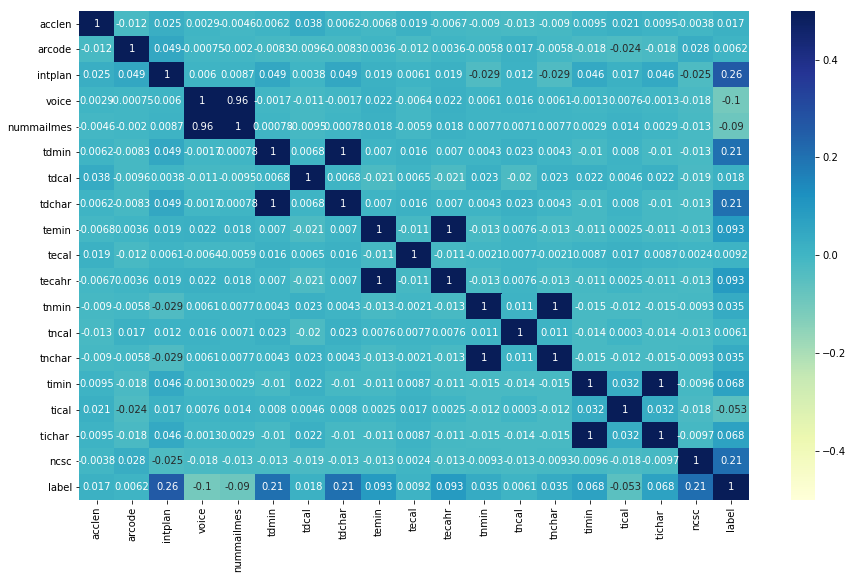

In [53]:
plt.figure(figsize=(15, 9))
sns.heatmap(df_train.corr() ,center=0, vmin=-0.5,vmax=0.5,cmap='YlGnBu',annot=True )

##Some charge and muniutes pair definitely close related##
##intplan,tdmin,tdchar,ncsc matter most to churn##

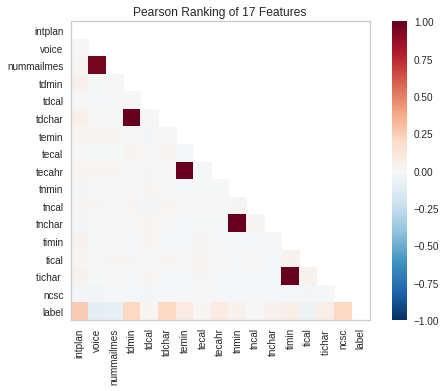

In [57]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df_train.iloc[:,4:])
visualizer.poof()

### hisgram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6af93770b8>,
      dtype=object)

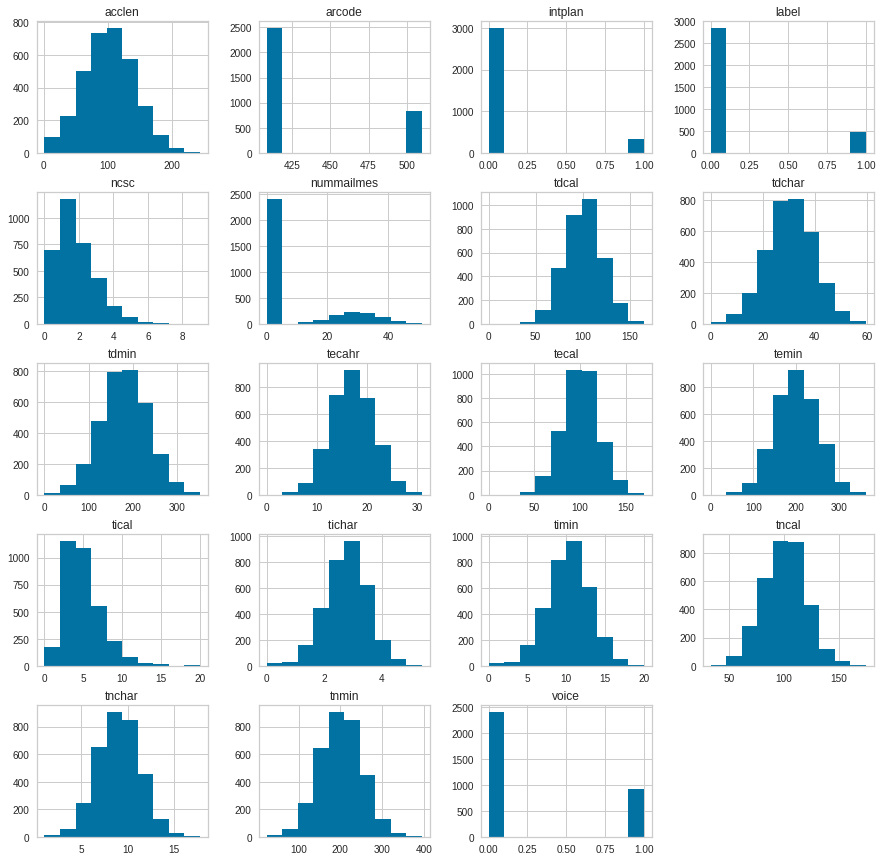

In [58]:
df_train.hist(figsize=(15, 15))

### pairplot

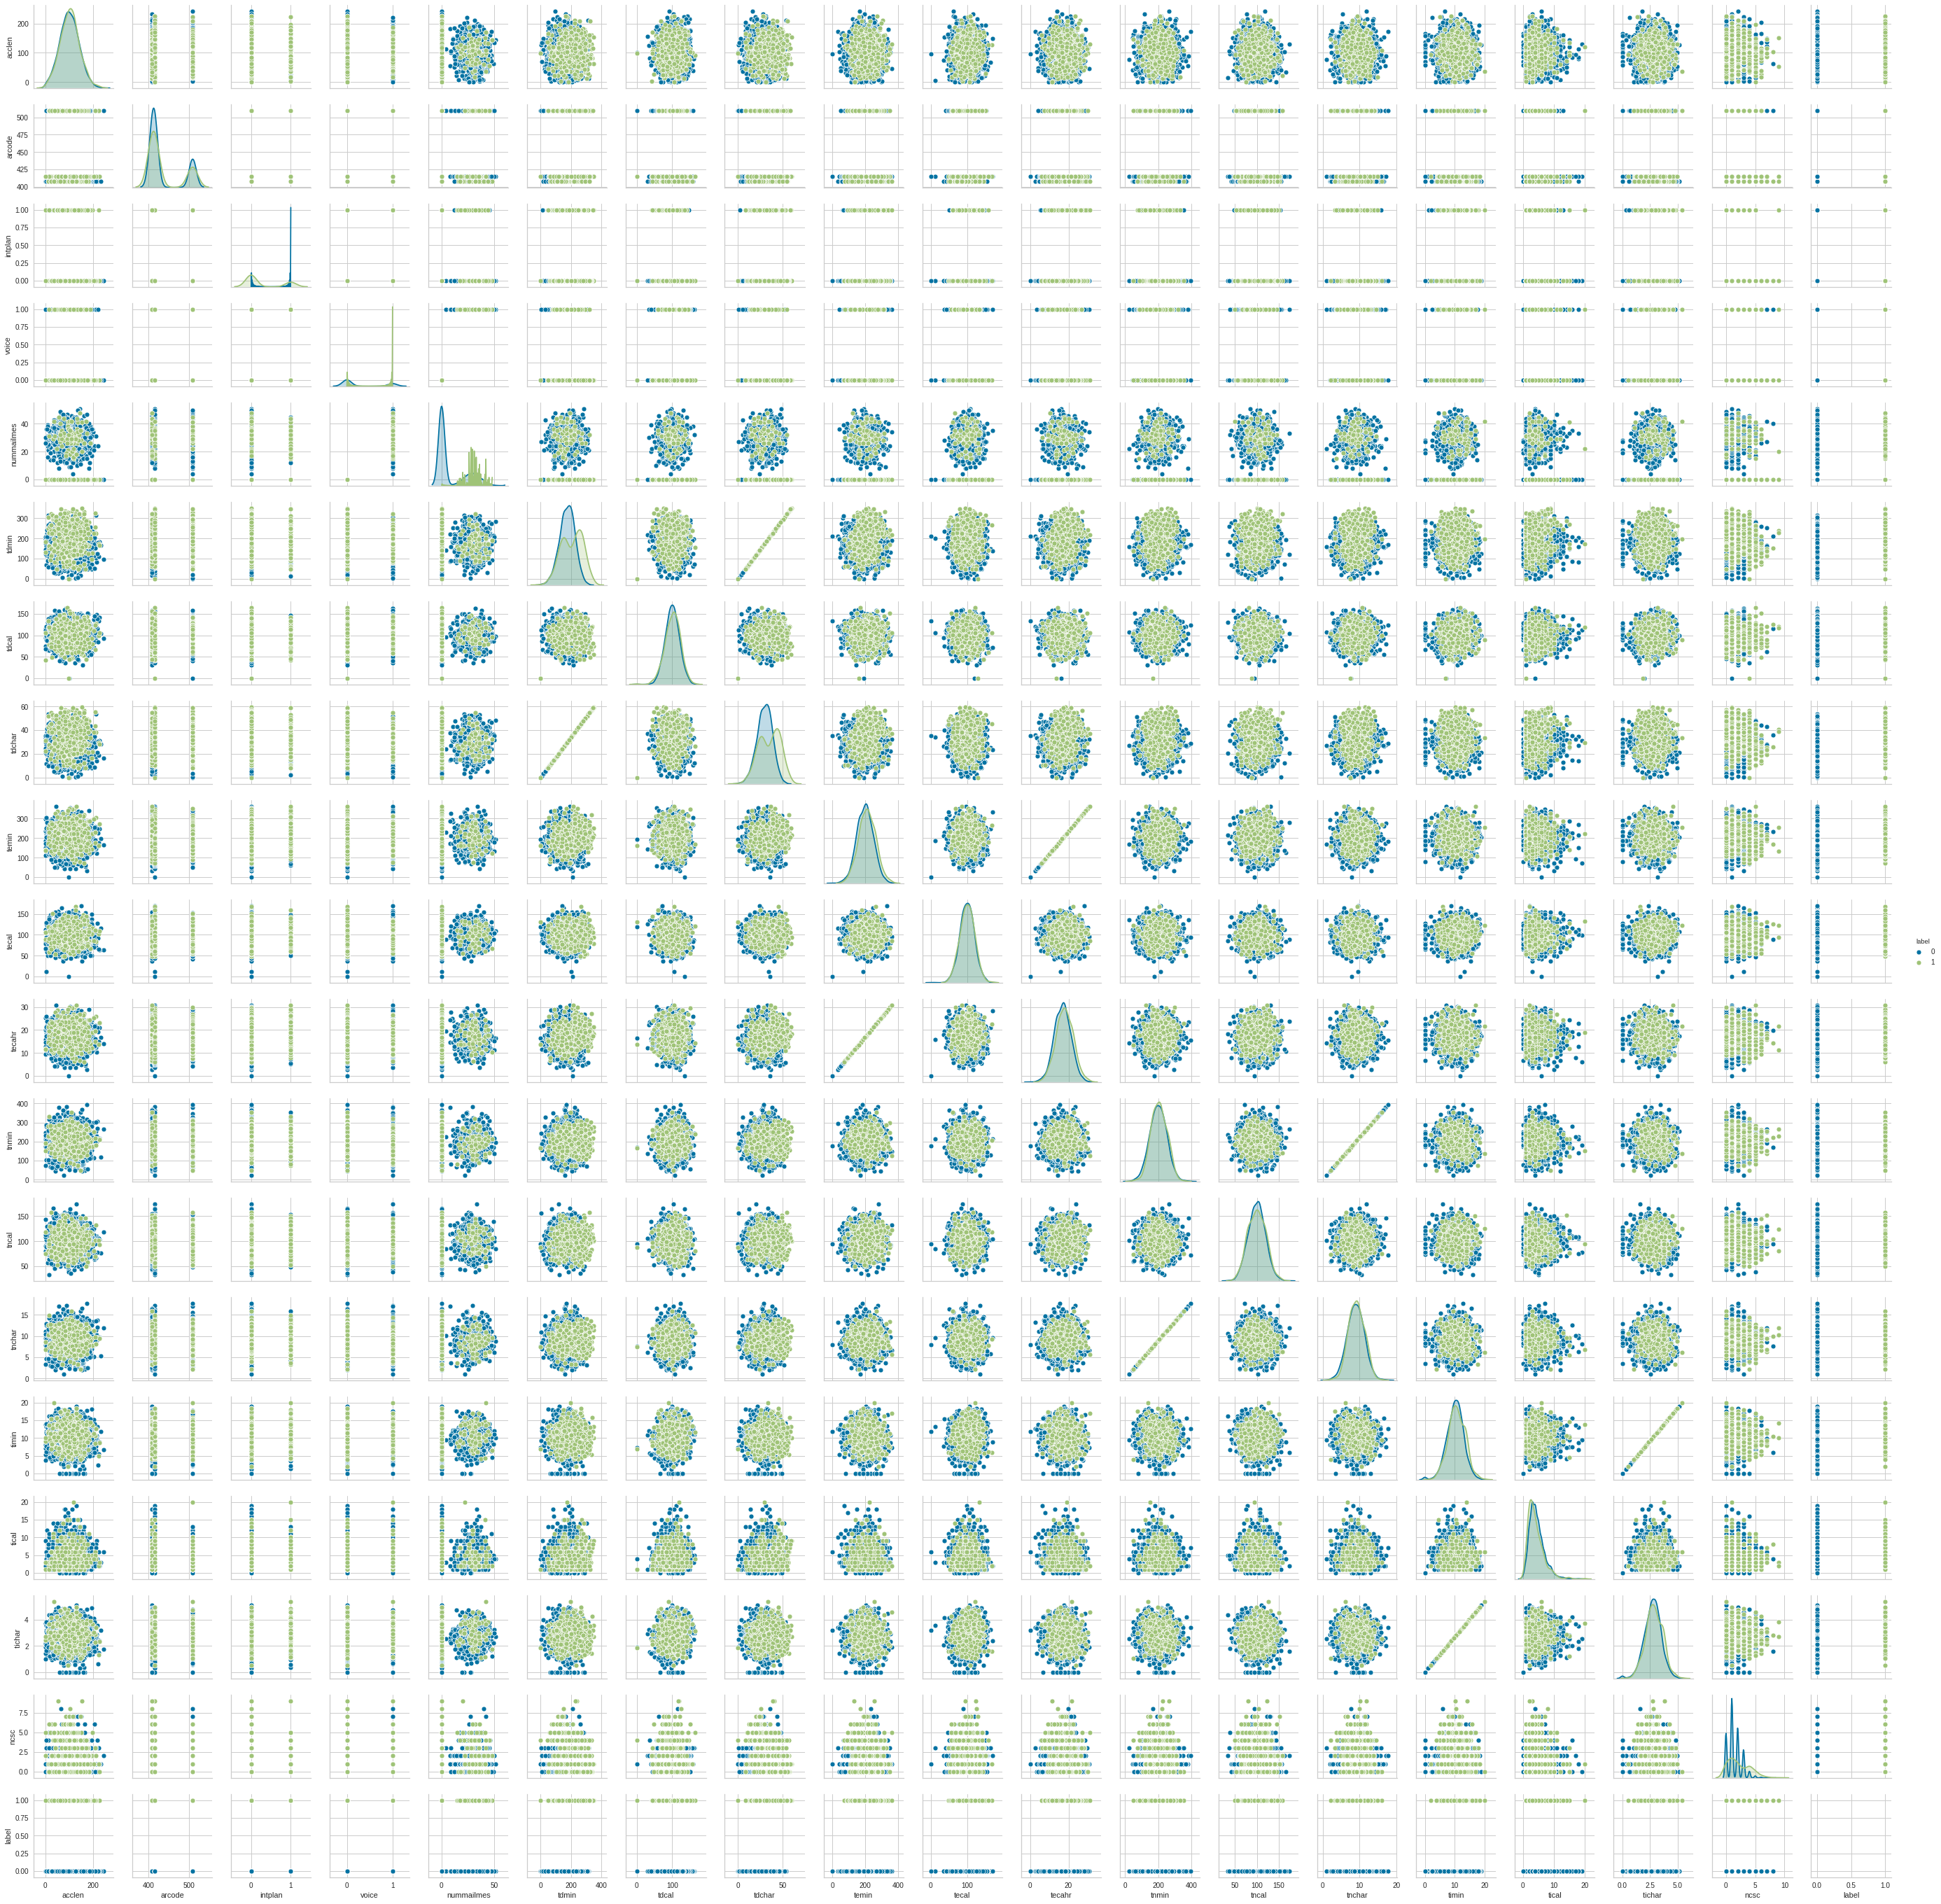

In [61]:
sns.pairplot(df_train, hue ='label', height= 2)

##Data Preprocessing

In [0]:
y_train = df_train.label
X_train = df_train.iloc[ : ,4:19]
y_test = df_test.label
X_test = df_test.iloc[ : ,4:19]

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Modeling

###Logistic

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression()
LR.fit(X_train,y_train)
prediction_LR=LR.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_LR,y_test))

The accuracy of the Logistic Regression is 0.871625674865027


###Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
prediction_rfc=rfc.predict(X_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(prediction_rfc,y_test))

The accuracy of the Random Forest is 0.9316136772645471


### SVM

In [92]:
from sklearn import svm

svc=svm.SVC()
svc.fit(X_train,y_train)
prediction_svc=svc.predict(X_test)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction_svc,y_test))


The accuracy of the SVC is 0.9160167966406718


## GridSearchCV for hyperparamaters tuning

### Logistic regresssion parameter tuning

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.00001,0.0001,0.001,0.01,0.1, 1, 10,100],'penalty':['l2','l1']}#,'penalty':['l2']
LR = LogisticRegression()


GS_LR = GridSearchCV(LR, param_grid, cv=12)
GS_LR.fit(X_train,y_train)

GridSearchCV(cv=12, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
GS_LR.best_params_

{'C': 1e-05, 'penalty': 'l2'}

In [107]:
lr =  LogisticRegression(C=0.00001,penalty='l2')
lr.fit(X_train,y_train)
prediction_lr=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_lr,y_test))

The accuracy of the Logistic Regression is 0.8842231553689263


###Random Forest parameter tuning

In [108]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':range(10,200,10)} ## {'n_estimators':[10,20,30,40,50,100,200, 300, 400,500],'max_depth' :[2,3,4,5,6,7,8,9,10]}

RF= RandomForestClassifier()

clf_RF = GridSearchCV(RF,parameters, cv=5)
clf_RF.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 200, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
clf_RF.best_params_

{'n_estimators': 120}

In [110]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=120)
RF.fit(X_train,y_train)
prediction_RF=RF.predict(X_test)
print('The accuracy of the Random Forest Regression is',metrics.accuracy_score(prediction_RF,y_test))
## best accuracy score is 0.938#

The accuracy of the Random Forest Regression is 0.9382123575284943


### SVM parameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10,100]}
SVC = svm.SVC(kernel='rbf')

clf_SVC = GridSearchCV(SVC, parameters, cv=5)
clf_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [113]:
clf_SVC.best_params_

{'C': 10}

In [114]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
SVC=svm.SVC(C = 10, kernel='rbf')
SVC.fit(X_train,y_train)
prediction_SVC=SVC.predict(X_test)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction_SVC,y_test))

The accuracy of the SVC is 0.9214157168566287


##Evaluation

###performance report

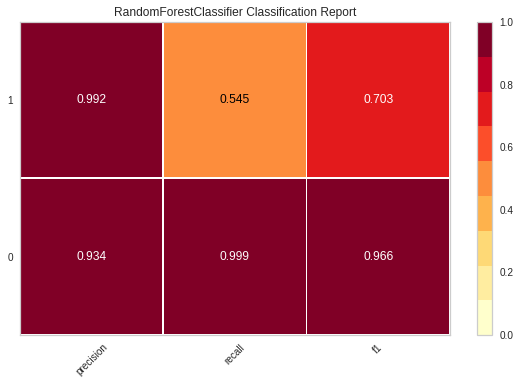

In [115]:
#After hyperparameter tuning, the best model is Random Forest classification model with n_estimators=120#
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier(n_estimators=120))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

###confusion matrix

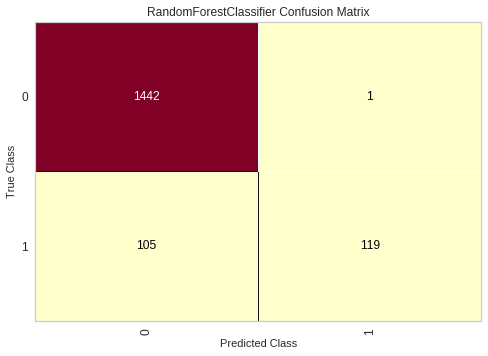

In [116]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(RandomForestClassifier(n_estimators=120))
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###interpretation


* **false negatives**：FN is really high(105 out of 224), which means about 47% churn customers are not be predicted successfully. This might cause large proportion of customers churn without pay attention on retaining them.
* **false positives**：FP is pretty low (1 out of 1443), which means that only few customers who are predicted to churn will not churn actually. It might help to retarget the high-churn-possibility customers, and reduce the expenditure spent on possible retain customers.

* Though the overall AUC of test set is 0.84 and the accuracy score is 0.938, the false negative rate is too high. That might because of over-fitting, or small train data size and reletively large test data size. It would be better if we re-split the train and test dataset or keep adjust the threshold. 

###AUC, ROC

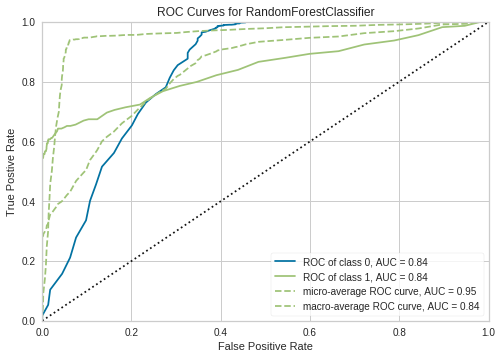

In [118]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(RandomForestClassifier(n_estimators=120))
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)
visualizer.poof()

##AUTO ML -- H20

###Install

In [0]:
! pip -q install h2o

     |████████████████████████████████| 121.8MB 204kB/s 


In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsd862wyj
  JVM stdout: /tmp/tmpsd862wyj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsd862wyj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_unknownUser_gxj9oe
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


### prepare data

In [99]:
auto_train = h2o.import_file("https://raw.githubusercontent.com/xinyanLyu/Telecom_churn/master/churn_train.txt", destination_frame="auto_train",header=1)
auto_test = h2o.import_file("https://raw.githubusercontent.com/xinyanLyu/Telecom_churn/master/churn_test.txt", destination_frame="auto_test",header=1)


print("Number of rows in train and test set : ", auto_train.shape[0], auto_test.shape[0])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train and test set :  3333 1667


In [100]:
auto_train.head( )

"st,","acclen,","arcode,","phnum,","intplan,","voice,nummailmes,","tdmin,","tdcal,","tdchar,","temin,","tecal,","tecahr,","tnmin,",tn,"cal,","tnchar,","timin,","tical,",tichar,"ncsc,",label
"KS,","128,","415,","382-4657,","no,","yes,","25,","265.1,","110,","45.07,","197.4,","99,","16.78,","244.7,","91,","11.01,","10,","3,","2.7,","1,",False.
"OH,","107,","415,","371-7191,","no,","yes,","26,","161.6,","123,","27.47,","195.5,","103,","16.62,","254.4,","103,","11.45,","13.7,","3,","3.7,","1,",False.
"NJ,","137,","415,","358-1921,","no,","no,","0,","243.4,","114,","41.38,","121.2,","110,","10.3,","162.6,","104,","7.32,","12.2,","5,","3.29,","0,",False.
"OH,","84,","408,","375-9999,","yes,","no,","0,","299.4,","71,","50.9,","61.9,","88,","5.26,","196.9,","89,","8.86,","6.6,","7,","1.78,","2,",False.
"OK,","75,","415,","330-6626,","yes,","no,","0,","166.7,","113,","28.34,","148.3,","122,","12.61,","186.9,","121,","8.41,","10.1,","3,","2.73,","3,",False.
"AL,","118,","510,","391-8027,","yes,","no,","0,","223.4,","98,","37.98,","220.6,","101,","18.75,","203.9,","118,","9.18,","6.3,","6,","1.7,","0,",False.
"MA,","121,","510,","355-9993,","no,","yes,","24,","218.2,","88,","37.09,","348.5,","108,","29.62,","212.6,","118,","9.57,","7.5,","7,","2.03,","3,",False.
"MO,","147,","415,","329-9001,","yes,","no,","0,","157,","79,","26.69,","103.1,","94,","8.76,","211.8,","96,","9.53,","7.1,","6,","1.92,","0,",False.
"LA,","117,","408,","335-4719,","no,","no,","0,","184.5,","97,","31.37,","351.6,","80,","29.89,","215.8,","90,","9.71,","8.7,","4,","2.35,","1,",False.
"WV,","141,","415,","330-8173,","yes,","yes,","37,","258.6,","84,","43.96,","222,","111,","18.87,","326.4,","97,","14.69,","11.2,","5,","3.02,","0,",False.


In [0]:
x =  auto_train.columns[:-1]
y = "label"


In [102]:
#x_train = auto_train.columns[:-1]
#x_test = auto_test.columns[:-1]

#y_train= auto_train[auto_train.columns[len(auto_train.columns)-1]]
#y_train.head(3)

label
False.
False.
False.


### automl modeling

In [106]:
aml = H2OAutoML(max_models=30, seed=1)

aml.train(x=x, y=y, training_frame =auto_train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190516_060116,0.850573,0.284656,0.234389,0.287951,0.0829158
StackedEnsemble_AllModels_AutoML_20190516_060116,0.850076,0.284744,0.220107,0.287783,0.0828191
XRT_1_AutoML_20190516_060116,0.811266,0.377856,0.236791,0.319442,0.102043
GBM_grid_1_AutoML_20190516_060116_model_2,0.776534,0.387927,0.26526,0.3431,0.117718
XGBoost_grid_1_AutoML_20190516_060116_model_5,0.762727,0.332857,0.286042,0.311873,0.0972648
XGBoost_grid_1_AutoML_20190516_060116_model_4,0.761836,0.335261,0.31503,0.312368,0.0975736
XGBoost_3_AutoML_20190516_060116,0.761812,0.336727,0.296201,0.314217,0.0987321
XGBoost_grid_1_AutoML_20190516_060116_model_1,0.759738,0.333847,0.300571,0.312469,0.0976369
GLM_grid_1_AutoML_20190516_060116_model_1,0.757075,0.350671,0.30808,0.323015,0.104339
XGBoost_grid_1_AutoML_20190516_060116_model_3,0.753486,0.346764,0.296043,0.320713,0.102857


In [107]:
# The leader model is stored here # StackedEnsemble_BestOfFamily_AutoML_20190516_060116, which reachs the AUC as high as 0.85(report on cross-validation )/ 0.98(report on train data )
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20190516_060116
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03240034727173567
RMSE: 0.1800009646411254
LogLoss: 0.13506654026720055
Null degrees of freedom: 3332
Residual degrees of freedom: 3327
Null deviance: 2758.2933249736407
Residual deviance: 900.353557421159
AIC: 912.353557421159
AUC: 0.9877305582797574
pr_auc: 0.938751178379786
Gini: 0.9754611165595148
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35252748667880063: 


,False.,True.,Error,Rate
False.,2795.0,55.0,0.0193,(55.0/2850.0)
True.,86.0,397.0,0.1781,(86.0/483.0)
Total,2881.0,452.0,0.0423,(141.0/3333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3525275,0.8491979,178.0
max f2,0.1639172,0.8788332,263.0
max f0point5,0.6006785,0.9192128,124.0
max accuracy,0.6006785,0.9594959,124.0
max precision,0.9980489,1.0,0.0
max recall,0.0977357,1.0,298.0
max specificity,0.9980489,1.0,0.0
max absolute_mcc,0.6006785,0.8287392,124.0
max min_per_class_accuracy,0.2054938,0.9301754,240.0
max mean_per_class_accuracy,0.1368427,0.9389997,278.0


Gains/Lift Table: Avg response rate: 14.49 %, avg score: 16.86 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102010,0.9830482,6.9006211,6.9006211,1.0,0.9891255,1.0,0.9891255,0.0703934,0.0703934,590.0621118,590.0621118
,2,0.0201020,0.9709705,6.9006211,6.9006211,1.0,0.9768907,1.0,0.9830994,0.0683230,0.1387164,590.0621118,590.0621118
,3,0.0300030,0.9464470,6.9006211,6.9006211,1.0,0.9582659,1.0,0.9749043,0.0683230,0.2070393,590.0621118,590.0621118
,4,0.0402040,0.9203904,6.9006211,6.9006211,1.0,0.9355281,1.0,0.9649133,0.0703934,0.2774327,590.0621118,590.0621118
,5,0.0501050,0.8986558,6.9006211,6.9006211,1.0,0.9087230,1.0,0.9538099,0.0683230,0.3457557,590.0621118,590.0621118
,6,0.1002100,0.7241658,6.7766579,6.8386395,0.9820359,0.8241406,0.9910180,0.8889752,0.3395445,0.6853002,577.6657864,583.8639491
,7,0.1500150,0.3004730,3.4087406,5.6999130,0.4939759,0.4510684,0.826,0.7435902,0.1697723,0.8550725,240.8740552,469.9913043
,8,0.2001200,0.1943113,1.7354856,4.7073203,0.2514970,0.2446027,0.6821589,0.6186563,0.0869565,0.9420290,73.5485551,370.7320253
,9,0.3000300,0.0741469,0.5802324,3.3330000,0.0840841,0.1272158,0.483,0.4550066,0.0579710,1.0,-41.9767594,233.3000000
,10,0.3999400,0.0573262,0.0,2.5003751,0.0,0.0638430,0.3623406,0.3572890,0.0,1.0,-100.0,150.0375094




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.08291575156222071
RMSE: 0.2879509533969643
LogLoss: 0.2846556435127868
Null degrees of freedom: 3332
Residual degrees of freedom: 3327
Null deviance: 2759.98048174458
Residual deviance: 1897.514519656237
AIC: 1909.514519656237
AUC: 0.8505728088336785
pr_auc: 0.6109498387185438
Gini: 0.701145617667357
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3065587466460019: 


,False.,True.,Error,Rate
False.,2641.0,209.0,0.0733,(209.0/2850.0)
True.,191.0,292.0,0.3954,(191.0/483.0)
Total,2832.0,501.0,0.12,(400.0/3333.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3065587,0.5934959,200.0
max f2,0.0811595,0.6651693,305.0
max f0point5,0.6139126,0.6141016,97.0
max accuracy,0.6139126,0.8895890,97.0
max precision,0.9954847,1.0,0.0
max recall,0.0261225,1.0,398.0
max specificity,0.9954847,1.0,0.0
max absolute_mcc,0.3065587,0.5232463,200.0
max min_per_class_accuracy,0.0811595,0.7971014,305.0
max mean_per_class_accuracy,0.0956944,0.7973913,294.0


Gains/Lift Table: Avg response rate: 14.49 %, avg score: 14.49 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102010,0.9058038,6.4947022,6.4947022,0.9411765,0.9402385,0.9411765,0.9402385,0.0662526,0.0662526,549.4702229,549.4702229
,2,0.0201020,0.8553402,6.2732919,6.3856494,0.9090909,0.8802187,0.9253731,0.9106765,0.0621118,0.1283644,527.3291925,538.5649393
,3,0.0300030,0.7894425,5.6459627,6.1415528,0.8181818,0.8183132,0.89,0.8801966,0.0559006,0.1842650,464.5962733,514.1552795
,4,0.0402040,0.7379030,4.0591889,5.6131918,0.5882353,0.7667565,0.8134328,0.8514133,0.0414079,0.2256729,305.9188893,461.3191805
,5,0.0501050,0.6905993,4.6004141,5.4130621,0.6666667,0.7152467,0.7844311,0.8245061,0.0455487,0.2712215,360.0414079,441.3062075
,6,0.1002100,0.4671121,3.4709711,4.4420166,0.5029940,0.5596183,0.6437126,0.6920622,0.1739130,0.4451346,247.0971101,344.2016588
,7,0.1500150,0.3058831,3.1593205,4.0161615,0.4578313,0.3790439,0.582,0.5881401,0.1573499,0.6024845,215.9320512,301.6161491
,8,0.2001200,0.1941112,1.9420910,3.4968665,0.2814371,0.2451997,0.5067466,0.5022765,0.0973085,0.6997930,94.2090973,249.6866474
,9,0.3000300,0.0776906,1.0361293,2.6774410,0.1501502,0.1140181,0.388,0.3729864,0.1035197,0.8033126,3.6129297,167.7440994
,10,0.3999400,0.0605284,0.3522840,2.0965878,0.0510511,0.0677950,0.3038260,0.2967458,0.0351967,0.8385093,-64.7716039,109.6587812


### interpret performance from business impact viewpoint (false negatives vs false positives)

* **false negatives**：FN is reasonable(17.81%), which means about 17.8% churn customers are not be predicted successfully. This might cause customer churn without pay attention on retaining them.
* **false positives**：FP is really low (1.93%), which means that only few customers who are predicted to churn will not churn actually. It might help to retarget the high-churn-possibility customers, and reduce the expenditure spent on possible retain customers.


In [110]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.coef_norm()

{'DRF_1_AutoML_20190516_060116': 0.029245584507127536,
 'DeepLearning_1_AutoML_20190516_060116': 0.0,
 'DeepLearning_grid_1_AutoML_20190516_060116_model_1': 0.0,
 'DeepLearning_grid_1_AutoML_20190516_060116_model_2': 0.013508696656246974,
 'DeepLearning_grid_1_AutoML_20190516_060116_model_3': 0.04124131481820144,
 'DeepLearning_grid_1_AutoML_20190516_060116_model_4': 0.0,
 'DeepLearning_grid_1_AutoML_20190516_060116_model_5': 0.06079991223783123,
 'GBM_1_AutoML_20190516_060116': 0.0,
 'GBM_2_AutoML_20190516_060116': 0.0,
 'GBM_3_AutoML_20190516_060116': 0.0,
 'GBM_4_AutoML_20190516_060116': 0.0,
 'GBM_5_AutoML_20190516_060116': 0.0,
 'GBM_grid_1_AutoML_20190516_060116_model_1': 0.0,
 'GBM_grid_1_AutoML_20190516_060116_model_2': 0.11496832791627105,
 'GBM_grid_1_AutoML_20190516_060116_model_3': 0.0,
 'GBM_grid_1_AutoML_20190516_060116_model_4': 0.0,
 'GLM_grid_1_AutoML_20190516_060116_model_1': 0.0,
 'Intercept': -2.3213151372878142,
 'XGBoost_1_AutoML_20190516_060116': 0.0,
 'XGBoost_2

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


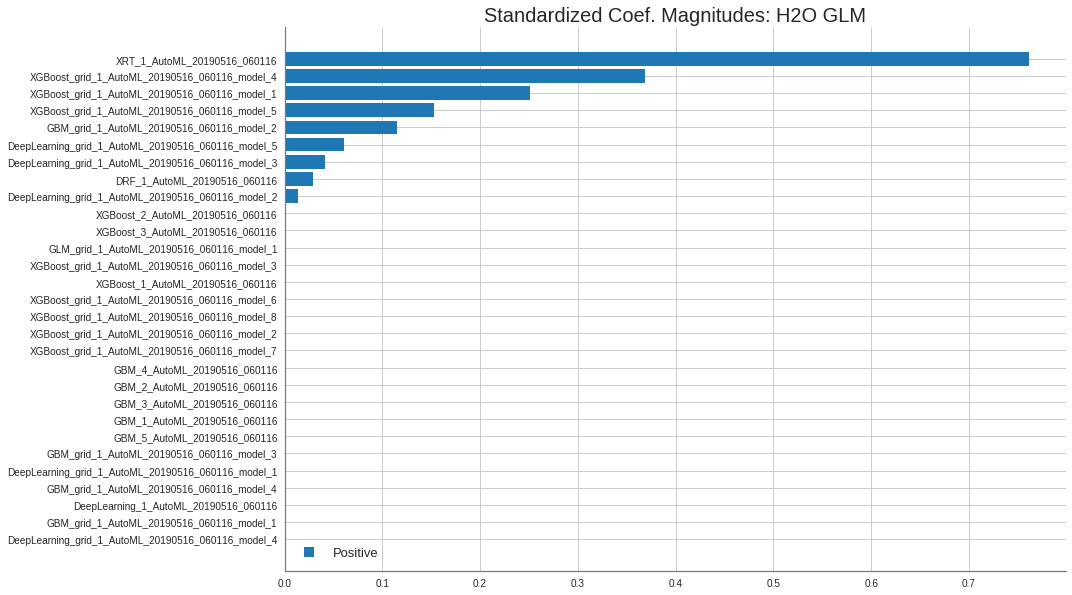

In [111]:
%matplotlib inline
metalearner.std_coef_plot()

###Predict Using Leader Model 

In [113]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly
preds = aml.predict(auto_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'acclen,' has levels not trained on: [14,, 187,, 216,, 222,, 233,, 238,]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'tdmin,' has levels not trained on: [52,, 6,]
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'tdcal,' has levels not trained on: [100.2,, 101.5,, 101.8,, 102.2,, 102.4,, 102.5,, 102.9,, 103.6,, 103.9,, 104.2,, 108.1,, 108.2,, 110.2,, 110.8,, 111.3,, 112.1,, 112.3,, 112.5,, 112.9,, 114.5,, 114.6,, 114.9,, 116.5,, 117.2,, 118.3,, 119.8,, 119.9,, 120,, 120.1,, 120.6,, 121.3,, 121.4,, 121.9,, 123.6,, 126.4,, 126.5,, 127.5,, 127.6,, 128.9,, 129.8,, 130.4,, 131,, 131.3,, 132.2,, 132.3,, 134.6,, 135.5,, 135.6,, 136,, 136.5,, 136.9,, 138.2,, 140.3,, 140.9,, 142.7,, 144.7,, 147.3,, 147.4,, 147.6,, 148,, 149.1,, 151.2,, 155.6,, 155.8,, 156.3,, 

In [114]:
preds.head()

predict,False.,True.
False.,0.946442,0.0535577
False.,0.959583,0.0404168
False.,0.785561,0.214439
False.,0.952829,0.0471709
False.,0.918436,0.0815642
False.,0.933266,0.0667336
False.,0.95412,0.04588
False.,0.954379,0.045621
False.,0.956794,0.0432058
False.,0.96769,0.0323098


###Evaluate Prediction of Leader Model

In [115]:
perf = aml.leader.model_performance(auto_test)
perf
## evaluate the result of test data, AUC is 0.77 


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08590472176647292
RMSE: 0.29309507291401693
LogLoss: 0.30559668576336885
Null degrees of freedom: 1666
Residual degrees of freedom: 1661
Null deviance: 1317.1761996055134
Residual deviance: 1018.8593503350717
AIC: 1030.8593503350717
AUC: 0.7703321453321453
pr_auc: 0.524399826554267
Gini: 0.5406642906642907
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3142701510699931: 


,False.,True.,Error,Rate
False.,1384.0,59.0,0.0409,(59.0/1443.0)
True.,122.0,102.0,0.5446,(122.0/224.0)
Total,1506.0,161.0,0.1086,(181.0/1667.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3142702,0.5298701,129.0
max f2,0.1284551,0.5523256,224.0
max f0point5,0.4240182,0.6106322,98.0
max accuracy,0.4240182,0.8968206,98.0
max precision,0.9849945,1.0,0.0
max recall,0.0342718,1.0,385.0
max specificity,0.9849945,1.0,0.0
max absolute_mcc,0.3142702,0.4785474,129.0
max min_per_class_accuracy,0.0647473,0.7096327,296.0
max mean_per_class_accuracy,0.1284551,0.7362374,224.0


Gains/Lift Table: Avg response rate: 13.44 %, avg score: 12.11 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101980,0.8909735,7.0042017,7.0042017,0.9411765,0.9405005,0.9411765,0.9405005,0.0714286,0.0714286,600.4201681,600.4201681
,2,0.0203959,0.8042509,6.1286765,6.5664391,0.8235294,0.8531657,0.8823529,0.8968331,0.0625,0.1339286,512.8676471,556.6439076
,3,0.0299940,0.7033527,6.0465960,6.4000893,0.8125,0.7442034,0.86,0.8479916,0.0580357,0.1919643,504.6595982,540.0089286
,4,0.0401920,0.6173900,4.8153887,5.9980011,0.6470588,0.6724379,0.8059701,0.8034481,0.0491071,0.2410714,381.5388655,499.8001066
,5,0.0503899,0.5473652,5.6909139,5.9358525,0.7647059,0.5833733,0.7976190,0.7589092,0.0580357,0.2991071,469.0913866,493.5852466
,6,0.1001800,0.3075555,3.2278399,4.5899540,0.4337349,0.4098530,0.6167665,0.5854262,0.1607143,0.4598214,222.7839931,358.9954021
,7,0.1499700,0.2057669,1.6139200,3.6019107,0.2168675,0.2590012,0.484,0.4770531,0.0803571,0.5401786,61.3919966,260.1910714
,8,0.2003599,0.1033809,1.0631378,2.9634169,0.1428571,0.1517782,0.3982036,0.3952474,0.0535714,0.59375,6.3137755,196.3416916
,9,0.2999400,0.0707115,0.8517911,2.2623571,0.1144578,0.0823617,0.304,0.2913694,0.0848214,0.6785714,-14.8208907,126.2357143
,10,0.4001200,0.0603150,0.4010639,1.7963362,0.0538922,0.0647250,0.2413793,0.2346233,0.0401786,0.71875,-59.8936056,79.6336207


### interpret performance from business impact viewpoint (false negatives vs false positives)



* **false negatives**：FN is really high(54.46%), which means about 54.46% churn customers are not be predicted successfully. This might cause large proportion of customers churn without pay attention on retaining them.
* **false positives**：FP is really low (4.09%), which means that only few customers who are predicted to churn will not churn actually. It might help to retarget the high-churn-possibility customers, and reduce the expenditure spent on possible retain customers.

* Though the overall AUC of test set is 0.77, the false negative rate is too high. That might because of over-fitting, or small train data size and reletively large test data size. It would be better if we re-split the train and test dataset. 

## Conclusion and recommendation

##**Conclusion**

* Compare with the Random Forest model, though the AutoML model has higher accuracy and AUC, it desn't perform well on test dataset, which might be caused by over-fitting problem.


* The Random Forest Model after tuning could achieve 0.938 accuracy and 0.84 AUC, which is the best model in this case. And the false positive is pretty low (1 out of 1443), which means that only few customers who are predicted to churn will not churn actually. It might help to precisely retarget the high-churn-possibility customer with reasonable expenditure effectively spent on possible retain customers.

* One way that the model could be improve is to aim at reducing the false negatives, which matter a lot on successfully predict the customer who will churn. Because the model has good performance on FP and accuracy, but not perform well on false negatives rate. It would be better if we re-split the train and test dataset, keep adjust the threshold, or upsampleing the train dataset.

##**recommendation**


* 1. From business operation perspective, from the EDA and model, we found that churn bucket and non-churn bucket generally have similar number of total day calls, but the churn group has high total day minutes and charge. Thus, the churn group may have more daytime call, and sensitive to the day time call charge/minute. The telecom company may need to provide them better day time call plans with lower charge/min in daytime, or a mobile package with no upper limit daytime minutes.

* 2. Another recommendation is from the observation of that the churn bucket has high number of 'ncsc' - number customer service calls. It means that those customer churn probably results from less convenient customer service or bad customer experience. Thus, the company ought to improve service quality and optimize the process of solving problem via call center.

